## Text Normalization

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading NLTK module
import nltk
# Sentence Tokenization
from nltk.tokenize import sent_tokenize
# Import nltk word_tokenize method
from nltk.tokenize import word_tokenize
# Import frequency distribution
from nltk.probability import FreqDist
# import the nltk stopwords
from nltk.corpus import stopwords
# Import Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
# Import Porter Stemmer
from nltk.stem.porter import PorterStemmer
# import Pos Tagger
from nltk import pos_tag

In [4]:
# Import spacy
import spacy
# Import display for visualizing the Entities
from spacy import displacy

In [5]:
# importing all necessary modules
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [6]:
# Input text
paragraph="""Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Converting paragraph in lowercase 
print(paragraph.lower()) 

taj mahal is one of the beautiful monuments. it is one of the wonders of the world. it was built by shah jahan in 1631 in memory of his third beloved wife mumtaj mahal.


## Tokenization

In [7]:
# downloading punkt
nltk.download('punkt')

# downloading stopwords
nltk.download('stopwords')

# downloading wordnet
nltk.download('wordnet')

# downloading average_perception_tagger 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/dmmil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/dmmil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dmmil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dmmil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
paragraph="""Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""
 
tokenized_sentences=sent_tokenize(paragraph)
print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.']


In [9]:
# Loading english language model
nlp = spacy.load("en_core_web_sm")

# Append the sentencizer pipe to the nlp pipeline
nlp.add_pipe('sentencizer')
 
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""
 
# Create nlp Object to handle linguistic annotations in a documents.
nlp_doc = nlp(paragraph)
 
# Generate list of tokenized sentence
tokenized_sentences = []
for sentence in nlp_doc.sents:
    tokenized_sentences.append(sentence.text)
print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.']


In [10]:
# Split paragraph into words
tokenized_words=word_tokenize(paragraph)
print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


In [11]:
# Loading english language model
nlp = spacy.load("en_core_web_lg")
 
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""
 
# Create nlp Object to handle linguistic annotations in a documents.
my_doc = nlp(paragraph)
 
# tokenize paragraph into words
tokenized_words = []
for token in my_doc:
    tokenized_words.append(token.text)
print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


In [12]:
# Find frequency distribution of paragraph
fdist = FreqDist(tokenized_words)
 
# Check top 5 common words
fdist.most_common(5)

[('of', 4), ('the', 3), ('.', 3), ('Mahal', 2), ('is', 2)]

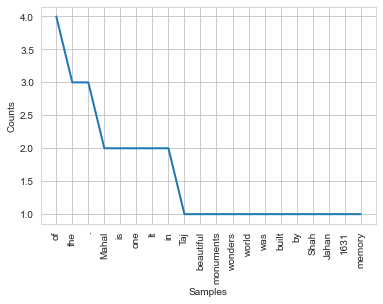

In [13]:
# Import matplotlib
import matplotlib.pyplot as plt
 
# Plot Frequency Distribution
fdist.plot(20, cumulative=False)
plt.show()

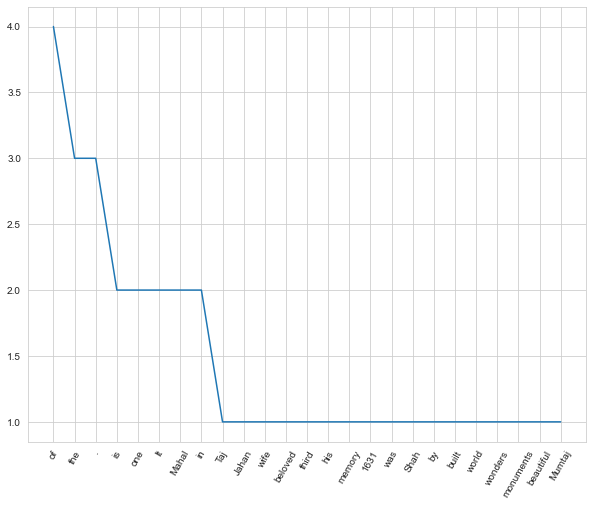

In [14]:
## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(fdist))
all_fdist.sort_values(ascending=False, inplace=True)

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.lineplot(x=all_fdist.index, y=all_fdist.values, ax=ax)

plt.xticks(rotation=60);

## Stopwords

In [15]:
# Load english stopwords list
stopwords_set = set(stopwords.words("english"))
 
# Removing stopwords from text
filtered_word_list=[]
for word in tokenized_words:
    # filter stopwords
    if word not in stopwords_set:
        filtered_word_list.append(word)

# print tokenized words
print("Tokenized Word List:", tokenized_words)

# print filtered words
print("Filtered Word List:", filtered_word_list)

Tokenized Word List: ['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']
Filtered Word List: ['Taj', 'Mahal', 'one', 'beautiful', 'monuments', '.', 'It', 'one', 'wonders', 'world', '.', 'It', 'built', 'Shah', 'Jahan', '1631', 'memory', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


In [16]:
# Loading english language model
nlp = spacy.load("en_core_web_lg")
 
# text paragraph
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in a documents.
my_doc = nlp(paragraph)
 
# Removing stopwords from text
filtered_token_list=[]
for token in my_doc:
    # filter stopwords 
    if token.is_stop==False:
        filtered_token_list.append(token)
        
print("Filtered Word List:",filtered_token_list)

Filtered Word List: [Taj, Mahal, beautiful, monuments, ., wonders, world, ., built, Shah, Jahan, 1631, memory, beloved, wife, Mumtaj, Mahal, .]


## Stemming and Lemmatization

In [17]:
# Create lemmatizer object
lemmatizer = WordNetLemmatizer()

# Create stemmer object
stemmer = PorterStemmer()

# take a sample word
sample_words = ["cry","cries","crying"]

for word in sample_words:
    print('Original Word: ', word)
    print("Stemmed Word:", stemmer.stem(word))
    print("Lemmatized Word:", lemmatizer.lemmatize(word,"v"))

Original Word:  cry
Stemmed Word: cri
Lemmatized Word: cry
Original Word:  cries
Stemmed Word: cri
Lemmatized Word: cry
Original Word:  crying
Stemmed Word: cri
Lemmatized Word: cry


In [18]:
# Loading english language model
nlp = spacy.load("en_core_web_sm")
 
# Create nlp Object to handle linguistic annotations in documents.
words = nlp("cry cries crying")
 
# Find lemmatized word
for w in words:
    print('Original Word: ', w.text)
    print('Lemmatized Word: ',w.lemma_)

Original Word:  cry
Lemmatized Word:  cry
Original Word:  cries
Lemmatized Word:  cry
Original Word:  crying
Lemmatized Word:  cry


## PoS Tagging

In [19]:
# Sample sentence
sentence = "Taj Mahal is one of the beautiful monument."
 
# Tokenize the sentence
sent_tokens = word_tokenize(sentence)
 
# Create PoS tags
sent_pos = pos_tag(sent_tokens)
 
# Print tokens with PoS
print(sent_pos)

[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('beautiful', 'JJ'), ('monument', 'NN'), ('.', '.')]


In [20]:
# Loading small english language model
nlp = spacy.load("en_core_web_lg")

# Create nlp Object to handle linguistic annotations in a documents.
sentence = nlp(u"Taj Mahal is one of the beautiful monument.")
 
for token in sentence:
    print(token.text, token.pos_)

Taj PROPN
Mahal PROPN
is AUX
one NUM
of ADP
the DET
beautiful ADJ
monument NOUN
. PUNCT


## Entity Recognition

In [21]:
# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_lg')
 
# Sample paragraph
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""
 
# Create nlp Object to handle linguistic annotations in documents.
docs=nlp(paragraph)
 
entities=[(i.text, i.label_) for i in docs.ents]
print(entities)

[('Taj Mahal', 'PERSON'), ('Shah Jahan', 'PERSON'), ('1631', 'DATE'), ('third', 'ORDINAL'), ('Mumtaj Mahal', 'PERSON')]


## Dependency Parsing

In [22]:
# Visualize the entities using render function
displacy.render(docs, style = "ent",jupyter = True)

In [23]:
# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_lg')
 
# Sample sentence
sentence="Taj Mahal is one of the beautiful monument."

# Create nlp Object to handle linguistic annotations in a documents.
docs=nlp(sentence)
 
# Visualize the  using render function
displacy.render(docs, style="dep", jupyter= True, options={'distance': 150})

## WordCloud

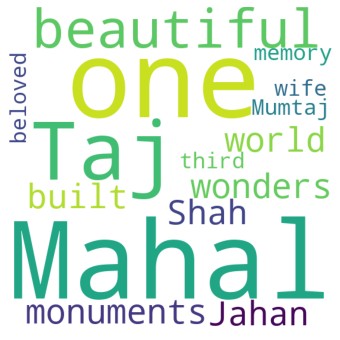

In [24]:
stopword_list = set(STOPWORDS)
 
paragraph="""Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""
 
word_cloud = WordCloud(width = 550, height = 550, 
                       background_color ='white', 
                       stopwords = stopword_list, 
                       min_font_size = 10)\
                    .generate(paragraph)
  
# Visualize the WordCloud Plot

# Set wordcloud figure size
plt.figure(figsize = (8, 6)) 
# Show image
plt.imshow(word_cloud) 
# Remove Axis
plt.axis("off")  
# show plot
plt.show()